In [74]:
import pandas as pd
import geopandas as gpd
import fiona
import json
import matplotlib.pyplot as plt
import os

## geojson 전체 파일에서 원하는 지역만 추출하기
- geopandas 이용
- https://github.com/vuski/admdongkor 의 전국 geojson 이용

In [8]:
path = r'D:\spatial_analysis\geopandas기초\HangJeongDong_ver20220701.geojson' #파일명 확장자까지 적어줌
path = path.replace('\\','//')

geo = gpd.read_file(path)
geo.head()

,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm,adm_cd8,geometry
0,1,서울특별시 종로구 사직동,1101053,1111053000,11110,11,서울특별시,종로구,11010530,"MULTIPOLYGON (((126.97689 37.57565, 126.97703 ..."
1,2,서울특별시 종로구 삼청동,1101054,1111054000,11110,11,서울특별시,종로구,11010540,"MULTIPOLYGON (((126.98269 37.59507, 126.98337 ..."
2,3,서울특별시 종로구 부암동,1101055,1111055000,11110,11,서울특별시,종로구,11010550,"MULTIPOLYGON (((126.97585 37.59656, 126.97359 ..."
3,4,서울특별시 종로구 평창동,1101056,1111056000,11110,11,서울특별시,종로구,11010560,"MULTIPOLYGON (((126.97507 37.63139, 126.97649 ..."
4,5,서울특별시 종로구 무악동,1101057,1111057000,11110,11,서울특별시,종로구,11010570,"MULTIPOLYGON (((126.96067 37.58080, 126.96281 ..."


In [52]:
# 시도 코드
# pd.set_option('display.max_rows', 500) # 행 최대로
pd.set_option('display.max_rows', 20)
geo[['sgg','sggnm']].value_counts()

sgg    sggnm
48170  진주시      30
45140  익산시      29
29170  북구       28
41590  화성시      28
11710  송파구      27
                ..
42790  화천군       5
42820  고성군       5
44250  계룡시       4
47940  울릉군       3
43745  증평군       2
Length: 250, dtype: int64

In [65]:
geo[geo['sgg'] == '41281']

,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm,adm_cd8,geometry
1347,1364,경기도 고양시덕양구 주교동,3110151,4128151000,41281,41,경기도,고양시덕양구,31101510,"MULTIPOLYGON (((126.84574 37.66707, 126.84449 ..."
1348,1365,경기도 고양시덕양구 원신동,3110152,4128152000,41281,41,경기도,고양시덕양구,31101520,"MULTIPOLYGON (((126.85255 37.68880, 126.85263 ..."
1349,1366,경기도 고양시덕양구 흥도동,3110153,4128153000,41281,41,경기도,고양시덕양구,31101530,"MULTIPOLYGON (((126.86222 37.65349, 126.86354 ..."
1350,1367,경기도 고양시덕양구 성사1동,3110154,4128154000,41281,41,경기도,고양시덕양구,31101540,"MULTIPOLYGON (((126.85259 37.65301, 126.85198 ..."
1351,1368,경기도 고양시덕양구 성사2동,3110155,4128155000,41281,41,경기도,고양시덕양구,31101550,"MULTIPOLYGON (((126.84927 37.64922, 126.84903 ..."
...,...,...,...,...,...,...,...,...,...,...
1363,1381,경기도 고양시덕양구 대덕동,3110168,4128167000,41281,41,경기도,고양시덕양구,31101680,"MULTIPOLYGON (((126.88224 37.59094, 126.88049 ..."
1364,1382,경기도 고양시덕양구 행신3동,3110174,4128165500,41281,41,경기도,고양시덕양구,31101514,"MULTIPOLYGON (((126.84113 37.62954, 126.84137 ..."
3501,1370,경기도 고양시덕양구 삼송1동,3110172,4128157600,41281,41,경기도,고양시덕양구,31101512,"MULTIPOLYGON (((126.88636 37.64788, 126.88585 ..."
3502,1370,경기도 고양시덕양구 삼송2동,3110173,4128157700,41281,41,경기도,고양시덕양구,31101513,"MULTIPOLYGON (((126.88585 37.64899, 126.88636 ..."


In [71]:
# sgg,sggnm
# or로 묶음 () 필수
geo_union = geo[(geo['sgg'] == '41285') | (geo['sgg'] == '41287') | (geo['sgg'] == '41281')]

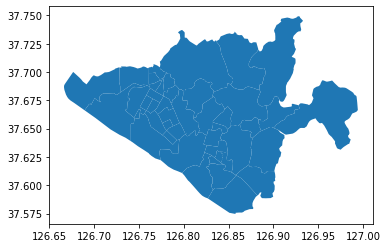

In [73]:
geo_union.plot()
plt.show()

## geojson으로 저장

In [76]:
## 공간데이터를 geojson으로 저장
# 경로설정
geo_union.to_file('../dataset/goyang_shape.geojson',driver='GeoJSON')